In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
import gc
from tqdm import tqdm, tqdm_notebook

C:\Users\Rit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('Train.csv')
sub = pd.read_csv('sample_submmission.csv')
test = pd.read_csv('test.csv')
fh = pd.read_csv('First_Health_Camp_Attended.csv')
sh = pd.read_csv('Second_Health_Camp_Attended.csv')
th = pd.read_csv('Third_Health_Camp_Attended.csv')
pp = pd.read_csv('Patient_Profile.csv')
hc = pd.read_csv('Health_Camp_Detail.csv')

In [3]:
pp.describe(include='all')

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
count,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633,37633,37633,37633,14249,2840
unique,NaN,NaN,NaN,NaN,NaN,8,228,51,1476,9,14
top,NaN,NaN,NaN,NaN,NaN,None,None,None,08-Sep-04,B,Technology
freq,NaN,NaN,NaN,NaN,NaN,33271,36249,32618,574,2662,649
mean,507148.408338,0.022533,0.027077,0.021603,0.023543,NaN,NaN,NaN,NaN,NaN,NaN
std,12411.747993,0.148412,0.162311,0.145387,0.151623,NaN,NaN,NaN,NaN,NaN,NaN
min,485678.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,496393.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,507104.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,517882.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pp['online_Activity_Score']=pp['Online_Follower']+pp['LinkedIn_Shared']+pp['Twitter_Shared']+pp['Facebook_Shared']
del pp['Online_Follower']
del pp['LinkedIn_Shared']
del pp['Twitter_Shared']
del pp['Facebook_Shared']

# Preprocessing

In [5]:
pp[['Income', 'Education_Score', 'Age']] = pp[['Income', 'Education_Score', 'Age']].apply(lambda x: x.str.replace('None', 'NaN').astype('float'))

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['City_Type','Employer_Category']:
    pp[col]=  pp[col].astype('str')
    pp[col]= le.fit_transform(pp[col])

In [7]:
pp['first_interaction_year'] = pd.to_datetime(pp['First_Interaction']).dt.year
pp['first_interaction_month'] = pd.to_datetime(pp['First_Interaction']).dt.month
pp['first_interaction_day'] = pd.to_datetime(pp['First_Interaction']).dt.day

In [8]:
train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7
...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0
75274,511952,6528,13-Feb-06,0,0,0,0,0
75275,521236,6554,24-May-05,0,0,0,0,0
75276,518817,6580,22-Dec-04,0,0,0,0,0


In [9]:
train['registration_year'] = pd.to_datetime(train['Registration_Date']).dt.year
train['registration_month'] = pd.to_datetime(train['Registration_Date']).dt.month
train['registration_day'] = pd.to_datetime(train['Registration_Date']).dt.day

In [10]:
train['Registration_Date']=pd.to_datetime(train['Registration_Date'])
train.sort_values(by=['Patient_ID','Registration_Date'],inplace=True)

In [11]:
train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,registration_year,registration_month,registration_day
69348,485679,6578,2005-08-22,0,0,0,0,0,2005.0,8.0,22.0
64479,485679,6555,2005-08-31,0,0,0,0,0,2005.0,8.0,31.0
6484,485680,6543,2006-07-10,0,0,0,0,0,2006.0,7.0,10.0
18999,485681,6580,2004-12-20,0,0,0,0,0,2004.0,12.0,20.0
2604,485681,6526,2005-01-01,0,0,0,0,0,2005.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18124,528657,6531,2004-12-11,0,0,0,0,0,2004.0,12.0,11.0
32744,528657,6580,2004-12-18,0,0,0,0,0,2004.0,12.0,18.0
7632,528657,6526,2004-12-30,0,0,0,0,0,2004.0,12.0,30.0
24471,528657,6536,2005-02-13,0,0,0,0,0,2005.0,2.0,13.0


In [12]:
train['days_since_last_registration'] = train.groupby('Patient_ID')['Registration_Date'].diff().apply(lambda x: x.days)
train['days_since_next_registration'] = train.groupby('Patient_ID')['Registration_Date'].diff(-1) * (-1) / np.timedelta64(1, 'D')       
train.reset_index(drop=True,inplace=True)

In [13]:
train['Unique_Health_Camp_per_patient']=train.groupby(['Patient_ID'])['Health_Camp_ID'].transform('nunique')
train['Unique_Patient_per_HealthCamp']=train.groupby(['Health_Camp_ID'])['Patient_ID'].transform('nunique')
train['Unique_year_per_patient']=train.groupby(['Patient_ID'])['registration_year'].transform('nunique')
train['Unique_months_per_patient']=train.groupby(['Patient_ID'])['registration_month'].transform('nunique')
train['Unique_day_per_patient']=train.groupby(['Patient_ID'])['registration_day'].transform('nunique')

# Preprocessing Test

In [14]:
test['registration_year'] = pd.to_datetime(test['Registration_Date']).dt.year
test['registration_month'] = pd.to_datetime(test['Registration_Date']).dt.month
test['registration_day'] = pd.to_datetime(test['Registration_Date']).dt.day

In [15]:
test['Registration_Date']=pd.to_datetime(test['Registration_Date'])
test.sort_values(by=['Patient_ID','Registration_Date'],inplace=True)

In [16]:
test['days_since_last_registration'] = test.groupby('Patient_ID')['Registration_Date'].diff().apply(lambda x: x.days)
test['days_since_next_registration'] = test.groupby('Patient_ID')['Registration_Date'].diff(-1) * (-1) / np.timedelta64(1, 'D')
test.reset_index(drop=True,inplace=True)

In [17]:
test['Unique_Health_Camp_per_patient']=test.groupby(['Patient_ID'])['Health_Camp_ID'].transform('nunique')
test['Unique_Patient_per_HealthCamp']=test.groupby(['Health_Camp_ID'])['Patient_ID'].transform('nunique')
test['Unique_year_per_patient']=test.groupby(['Patient_ID'])['registration_year'].transform('nunique')
test['Unique_months_per_patient']=test.groupby(['Patient_ID'])['registration_month'].transform('nunique')
test['Unique_day_per_patient']=test.groupby(['Patient_ID'])['registration_day'].transform('nunique')

In [18]:
train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,registration_year,registration_month,registration_day,days_since_last_registration,days_since_next_registration,Unique_Health_Camp_per_patient,Unique_Patient_per_HealthCamp,Unique_year_per_patient,Unique_months_per_patient,Unique_day_per_patient
0,485679,6578,2005-08-22,0,0,0,0,0,2005.0,8.0,22.0,NaN,9.0,2,2837,1.0,1.0,2.0
1,485679,6555,2005-08-31,0,0,0,0,0,2005.0,8.0,31.0,9.0,NaN,2,1738,1.0,1.0,2.0
2,485680,6543,2006-07-10,0,0,0,0,0,2006.0,7.0,10.0,NaN,NaN,1,6543,1.0,1.0,1.0
3,485681,6580,2004-12-20,0,0,0,0,0,2004.0,12.0,20.0,NaN,12.0,2,3517,2.0,2.0,2.0
4,485681,6526,2005-01-01,0,0,0,0,0,2005.0,1.0,1.0,12.0,NaN,2,3809,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,528657,6531,2004-12-11,0,0,0,0,0,2004.0,12.0,11.0,NaN,7.0,5,120,2.0,3.0,5.0
75274,528657,6580,2004-12-18,0,0,0,0,0,2004.0,12.0,18.0,7.0,12.0,5,3517,2.0,3.0,5.0
75275,528657,6526,2004-12-30,0,0,0,0,0,2004.0,12.0,30.0,12.0,45.0,5,3809,2.0,3.0,5.0
75276,528657,6536,2005-02-13,0,0,0,0,0,2005.0,2.0,13.0,45.0,215.0,5,2037,2.0,3.0,5.0


In [19]:
# find unique between train and test sets

cols =  ['Patient_ID']
for col in cols:
  print('Total unique'+col  +' values in Train are {}'.format(train[col].nunique()))
  print('Total unique'+col  +' values in Test are {}'.format(test[col].nunique()))
  print('Common'+col +' values are {}'.format(len(list(set(train[col]) & set(test[col])))))
  print('**************************')

Total uniquePatient_ID values in Train are 29828
Total uniquePatient_ID values in Test are 15324
CommonPatient_ID values are 8460
**************************


In [20]:
# Merging train,test with Patient Profile

train = pd.merge(train, pp, on = 'Patient_ID', how = 'left')
test = pd.merge(test, pp, on = 'Patient_ID', how = 'left')

In [21]:
# Getting Target

for c in [fh, sh, th, train]:
  c['id'] = c['Patient_ID'].astype('str') + c['Health_Camp_ID'].astype('str')
th = th[th['Number_of_stall_visited'] > 0]

all_patients_in_camp = pd.Series(fh['id'].tolist() + sh['id'].tolist() + th['id'].tolist()).unique()

train['target'] = 0
train.loc[train['id'].isin(all_patients_in_camp), 'target'] = 1

In [22]:
train['target'].value_counts() # This was created for segregating the patients 

0    54744
1    20534
Name: target, dtype: int64

In [23]:
train


,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,registration_year,registration_month,registration_day,days_since_last_registration,days_since_next_registration,Unique_Health_Camp_per_patient,Unique_Patient_per_HealthCamp,Unique_year_per_patient,Unique_months_per_patient,Unique_day_per_patient,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,online_Activity_Score,first_interaction_year,first_interaction_month,first_interaction_day,id,target
0,485679,6578,2005-08-22,0,0,0,0,0,2005.0,8.0,22.0,NaN,9.0,2,2837,1.0,1.0,2.0,NaN,NaN,NaN,12-Aug-05,8,14,0,2005,8,12,4856796578,1
1,485679,6555,2005-08-31,0,0,0,0,0,2005.0,8.0,31.0,9.0,NaN,2,1738,1.0,1.0,2.0,NaN,NaN,NaN,12-Aug-05,8,14,0,2005,8,12,4856796555,0
2,485680,6543,2006-07-10,0,0,0,0,0,2006.0,7.0,10.0,NaN,NaN,1,6543,1.0,1.0,1.0,NaN,NaN,NaN,10-Jul-06,0,14,0,2006,7,10,4856806543,0
3,485681,6580,2004-12-20,0,0,0,0,0,2004.0,12.0,20.0,NaN,12.0,2,3517,2.0,2.0,2.0,0.0,NaN,46.0,19-Dec-04,6,14,1,2004,12,19,4856816580,0
4,485681,6526,2005-01-01,0,0,0,0,0,2005.0,1.0,1.0,12.0,NaN,2,3809,2.0,2.0,2.0,0.0,NaN,46.0,19-Dec-04,6,14,1,2004,12,19,4856816526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,528657,6531,2004-12-11,0,0,0,0,0,2004.0,12.0,11.0,NaN,7.0,5,120,2.0,3.0,5.0,NaN,NaN,NaN,25-Oct-04,3,14,0,2004,10,25,5286576531,1
75274,528657,6580,2004-12-18,0,0,0,0,0,2004.0,12.0,18.0,7.0,12.0,5,3517,2.0,3.0,5.0,NaN,NaN,NaN,25-Oct-04,3,14,0,2004,10,25,5286576580,0
75275,528657,6526,2004-12-30,0,0,0,0,0,2004.0,12.0,30.0,12.0,45.0,5,3809,2.0,3.0,5.0,NaN,NaN,NaN,25-Oct-04,3,14,0,2004,10,25,5286576526,0
75276,528657,6536,2005-02-13,0,0,0,0,0,2005.0,2.0,13.0,45.0,215.0,5,2037,2.0,3.0,5.0,NaN,NaN,NaN,25-Oct-04,3,14,0,2004,10,25,5286576536,1


In [24]:
hc.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2


In [25]:
def timediff(duration):
    duration_in_s = duration.total_seconds()
    days = divmod(duration_in_s, 86400)[0]
    return days

hc['Camp_Duration']=pd.to_datetime(hc['Camp_End_Date'])-pd.to_datetime(hc['Camp_Start_Date'])
hc['Camp_Duration']=hc['Camp_Duration'].apply(timediff)

In [26]:
hc.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration
0,6560,16-Aug-03,20-Aug-03,First,B,2,4.0
1,6530,16-Aug-03,28-Oct-03,First,C,2,73.0


In [27]:
hc['camp_start_year'] = pd.to_datetime(hc['Camp_Start_Date']).dt.year
hc['camp_start_month'] = pd.to_datetime(hc['Camp_Start_Date']).dt.month
hc['camp_start_day'] = pd.to_datetime(hc['Camp_Start_Date']).dt.day

hc['camp_end_year'] = pd.to_datetime(hc['Camp_End_Date']).dt.year
hc['camp_end_month'] = pd.to_datetime(hc['Camp_End_Date']).dt.month
hc['camp_end_day'] = pd.to_datetime(hc['Camp_End_Date']).dt.day

In [28]:
hc['Category1'] = hc['Category1'].map({'First': 1, 'Second': 2, 'Third': 3})
hc['Category2'] = pd.factorize(hc['Category2'])[0]
# codes, uniques = pd.factorize(['b', 'b', 'a', 'c', 'b'])
# >>> codes
# array([0, 0, 1, 2, 0])
# >>> uniques
# array(['b', 'a', 'c'], dtype=object)

In [29]:
hc.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration,camp_start_year,camp_start_month,camp_start_day,camp_end_year,camp_end_month,camp_end_day
0,6560,16-Aug-03,20-Aug-03,1,0,2,4.0,2003,8,16,2003,8,20
1,6530,16-Aug-03,28-Oct-03,1,1,2,73.0,2003,8,16,2003,10,28


In [30]:
# Merging train,test with health camp details

train = pd.merge(train, hc, on = 'Health_Camp_ID', how = 'left')
test = pd.merge(test, hc, on = 'Health_Camp_ID', how = 'left')

In [31]:
# More Feature Engineering
train['Unique_camp_year_per_patient']=train.groupby(['Patient_ID'])['camp_start_year'].transform('nunique')
train['Unique_camp_months_per_patient']=train.groupby(['Patient_ID'])['camp_start_month'].transform('nunique')
train['Unique_camp_day_per_patient']=train.groupby(['Patient_ID'])['camp_start_day'].transform('nunique')
test['Unique_camp_year_per_patient']=test.groupby(['Patient_ID'])['camp_start_year'].transform('nunique')
test['Unique_camp_months_per_patient']=test.groupby(['Patient_ID'])['camp_start_month'].transform('nunique')
test['Unique_camp_day_per_patient']=test.groupby(['Patient_ID'])['camp_start_day'].transform('nunique')

In [32]:
# Concat

train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 35248
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Patient_ID                      110527 non-null  int64         
 1   Health_Camp_ID                  110527 non-null  int64         
 2   Registration_Date               110193 non-null  datetime64[ns]
 3   Var1                            110527 non-null  int64         
 4   Var2                            110527 non-null  int64         
 5   Var3                            110527 non-null  int64         
 6   Var4                            110527 non-null  int64         
 7   Var5                            110527 non-null  int64         
 8   registration_year               110193 non-null  float64       
 9   registration_month              110193 non-null  float64       
 10  registration_day                110193 non-null  float64 

In [ ]:
parent_var='Patient_ID'
df_name='agg'
parent_ids = df[parent_var].copy()
numeric_df = df.select_dtypes('number').drop(columns={'Patient_ID', 'Health_Camp_ID','target'}).copy()
numeric_df[parent_var] = parent_ids

In [ ]:
numeric_df

In [ ]:
# Group by the specified variable and calculate the statistics
agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

In [ ]:
agg

In [ ]:
# Need to create new column names
columns = []

# Iterate through the variables names
for var in agg.columns.levels[0]:
    if var != parent_var:
        # Iterate through the stat names
        for stat in agg.columns.levels[1]:
            # Make a new column name for the variable and stat
            columns.append('%s_%s_%s' % (df_name, var, stat))

agg.columns = columns

In [ ]:
agg.columns

In [ ]:
agg

In [ ]:
np.unique(agg,axis=1,return_index=True)

In [ ]:
agg.iloc[:,([100,121])]

In [ ]:
# Remove the columns with all redundant values
_, idx = np.unique(agg, axis = 1, return_index=True)
agg = agg.iloc[:, idx]

In [34]:
# numeric aggregate feataures grouped by patient_ID
def agg_numeric(df, parent_var, df_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df (dataframe): 
            the child dataframe to calculate the statistics on
        parent_var (string): 
            the parent variable used for grouping and aggregating
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_var` for 
            all numeric columns. Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `df_name`. Columns with all duplicate
            values are removed. 
    
    """
    
            
    # Only want the numeric variables
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').drop(columns={'Patient_ID', 'Health_Camp_ID','target'}).copy()
    numeric_df[parent_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [35]:
PID_aggregate = agg_numeric(df, 'Patient_ID', 'agg')
print('PID aggregate shape: ', PID_aggregate.shape)
df=df.merge(PID_aggregate, on ='Patient_ID', how = 'left')

PID aggregate shape:  (36692, 141)


In [36]:
PID_aggregate

,agg_Var3_min,agg_Var3_mean,agg_Var3_max,agg_Var3_sum,agg_Var4_min,agg_Var2_min,agg_Var5_min,agg_Var1_min,agg_Var4_mean,agg_Var2_mean,agg_Var5_mean,agg_Var4_max,agg_Var4_sum,agg_Var1_mean,agg_Var2_max,agg_Var1_max,agg_Var5_max,agg_Var2_sum,agg_Var5_sum,agg_Var1_sum,agg_Education_Score_count,agg_Income_sum,agg_Education_Score_sum,agg_online_Activity_Score_mean,agg_online_Activity_Score_sum,agg_Income_count,agg_Age_count,agg_Age_sum,agg_days_since_last_registration_count,agg_City_Type_mean,agg_days_since_last_registration_sum,agg_City_Type_sum,agg_Unique_year_per_patient_min,agg_Unique_year_per_patient_mean,agg_Unique_year_per_patient_max,agg_Unique_months_per_patient_min,agg_Unique_months_per_patient_mean,agg_Unique_months_per_patient_max,agg_Unique_camp_year_per_patient_min,agg_Unique_camp_year_per_patient_mean,agg_Unique_camp_year_per_patient_max,agg_Unique_day_per_patient_min,agg_Unique_day_per_patient_mean,agg_Unique_day_per_patient_max,agg_Unique_camp_months_per_patient_min,agg_Unique_camp_months_per_patient_mean,agg_Unique_camp_months_per_patient_max,agg_Unique_camp_day_per_patient_min,agg_Unique_Health_Camp_per_patient_min,agg_Unique_camp_day_per_patient_mean,...,agg_camp_end_month_sum,agg_first_interaction_day_mean,agg_camp_start_day_min,agg_camp_start_day_mean,agg_camp_start_day_max,agg_registration_day_min,agg_first_interaction_day_sum,agg_registration_day_mean,agg_registration_day_max,agg_camp_start_day_sum,agg_registration_day_sum,agg_Employer_Category_mean,agg_Employer_Category_sum,agg_camp_end_day_min,agg_camp_end_day_mean,agg_camp_end_day_max,agg_camp_end_day_sum,agg_camp_start_year_min,agg_camp_start_year_mean,agg_camp_start_year_max,agg_first_interaction_year_mean,agg_registration_year_min,agg_registration_year_mean,agg_registration_year_max,agg_camp_end_year_min,agg_camp_end_year_mean,agg_camp_end_year_max,agg_camp_start_year_sum,agg_first_interaction_year_sum,agg_registration_year_sum,agg_camp_end_year_sum,agg_Unique_Patient_per_HealthCamp_min,agg_Unique_Patient_per_HealthCamp_mean,agg_Unique_Patient_per_HealthCamp_max,agg_Unique_Patient_per_HealthCamp_sum,agg_days_since_last_registration_min,agg_days_since_next_registration_min,agg_days_since_last_registration_mean,agg_days_since_next_registration_mean,agg_days_since_last_registration_max,agg_days_since_next_registration_max,agg_Income_mean,agg_Income_max,agg_Income_min,agg_Age_mean,agg_Age_max,agg_Age_min,agg_Education_Score_mean,agg_Education_Score_max,agg_Education_Score_min
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
485678,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,1.0,1.000000,1.0,1.0,1.000000,1.0,1,1.000000,1,1.0,1.000000,1.0,1,1.000000,1,1,1,1.000000,...,11,13,13,13.000000,13,13.0,13,13.000000,13.0,13,13.0,14,14,18,18.0,18,18,2006,2006.0,2006,2006,2006.0,2006.000000,2006.0,2006,2006.000000,2006,2006,2006,2006.0,2006,2180,2180.0,2180,2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485679,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,1,8,9.0,16,1.0,1.000000,1.0,1.0,1.000000,1.0,1,1.000000,1,2.0,2.000000,2.0,2,2.000000,2,2,2,2.000000,...,19,12,15,15.500000,16,22.0,24,26.500000,31.0,31,53.0,14,28,14,16.5,19,33,2005,2005.0,2005,2005,2005.0,2005.000000,2005.0,2005,2005.000000,2005,4010,4010,4010.0,4010,1738,2287.5,2837,4575,9.0,9.0,9.00,9.00,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485680,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,1.0,1.000000,1.0,1.0,1.000000,1.0,1,1.000000,1,1.0,1.000000,1.0,1,1.000000,1,1,1,1.000000,...,11,10,27,27.000000,27,10.0,10,10.000000,10.0,27,10.0,14,14,7,7.0,7,7,2005,2005.0,2005,2006,2006.0,2006.000000,2006.0,2007,2007.000000,2007,2005,2006,2006.0,2007,6543,6543.0,6543,6543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485681,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0.0,1,2,2,2,92.0,1,6,12.0,12,2.0,2.000000,2.0

In [37]:
df['Patient_Registered_before_days']=pd.to_datetime(df['Camp_Start_Date'])-pd.to_datetime(df['Registration_Date'])
df['Patient_Registered_before_days']=df['Patient_Registered_before_days'].apply(timediff)

In [38]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

In [39]:
# Creating Time based validation for 5 months ,as same as public and private test period

In [40]:
trn=train[train['Camp_Start_Date'] <'2005-11-01']
val=train[train['Camp_Start_Date'] >'2005-10-30']

In [41]:
train.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'registration_year', 'registration_month',
       ...
       'agg_Income_mean', 'agg_Income_max', 'agg_Income_min', 'agg_Age_mean',
       'agg_Age_max', 'agg_Age_min', 'agg_Education_Score_mean',
       'agg_Education_Score_max', 'agg_Education_Score_min',
       'Patient_Registered_before_days'],
      dtype='object', length=187)

In [42]:
TARGET_COL = 'target'
features = [c for c in trn.columns if c not in ['Patient_ID', 'Health_Camp_ID','Category3','Registration_Date', 'id','target','Camp_Start_Date','Camp_End_Date','First_Interaction',TARGET_COL]]
len(features)

178

In [43]:
# validating the data

from lightgbm import LGBMClassifier

In [44]:
clf = LGBMClassifier(n_estimators=550,
                     learning_rate=0.03,
                     min_child_samples=40,
                     random_state=1,
                     colsample_bytree=0.5,
                     reg_alpha=2,
                     reg_lambda=2)

clf.fit(trn[features], trn[TARGET_COL], eval_set=[(val[features], val[TARGET_COL])], verbose=50,
        eval_metric = 'auc', early_stopping_rounds = 100)

preds = clf.predict_proba(test[features])[:, 1]

Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.834735	valid_0's binary_logloss: 0.423667
[100]	valid_0's auc: 0.841262	valid_0's binary_logloss: 0.400654
[150]	valid_0's auc: 0.84321	valid_0's binary_logloss: 0.394771
[200]	valid_0's auc: 0.844005	valid_0's binary_logloss: 0.393559
[250]	valid_0's auc: 0.844655	valid_0's binary_logloss: 0.392633
[300]	valid_0's auc: 0.844292	valid_0's binary_logloss: 0.392153
[350]	valid_0's auc: 0.844625	valid_0's binary_logloss: 0.392478
Early stopping, best iteration is:
[262]	valid_0's auc: 0.845152	valid_0's binary_logloss: 0.391976


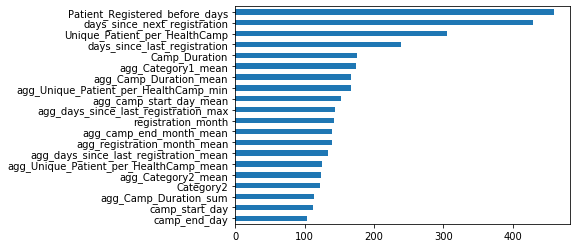

In [45]:
# Removing 0 importance feature didnt help

fi = pd.Series(index = features, data = clf.feature_importances_)
fi.sort_values(ascending=False)[0:20][::-1].plot(kind = 'barh')

In [46]:
preds = 0
for seed_val in [1,3,10,15,20,33,333,1997,2020,2021]:
    print (seed_val)
    m=LGBMClassifier(n_estimators=450,learning_rate=0.03,random_state=seed_val,colsample_bytree=0.5,reg_alpha=2,reg_lambda=2)
    m.fit(train[features],train['target'])
    predict=m.predict_proba(test[features])[:,1]
    preds += predict
preds = preds/10

1
3
10
15
20
33
333
1997
2020
2021


In [47]:
sub = pd.DataFrame({"Patient_ID":test.Patient_ID.values})
sub["Health_Camp_ID"] = test.Health_Camp_ID.values
sub["Outcome"] =  preds